# Линейная регрессия

In [26]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

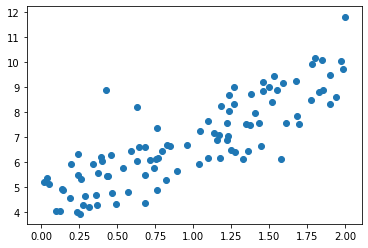

In [27]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

# Пакетный и стохастический градиентный спуск


Линейная регрессия, приближающая некоторую зависимость:  
<p style="text-align: center;">$\hat{y_i} = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + ... + \beta_n x_{n,i}$ (1)</p>
Простейший вариант:  

<p style="text-align: center;">$\hat{y_i} = \beta_0 + \beta_1 x_{i}$</p>   


**Задача: подобрать коэффициенты $\beta$ таким образом, чтобы наиболее точно апроксимировать(приблизить) моделируемую зависимость.**
Для реализации градиентного спуска необходимо итеративно вычислять градиент функции ошибки относительно параметров $\beta$. Другими словами, мы вычисляем как сильно изменится функция ошибки, если мы немного изменим каждый из коэффициентов $\beta$. Это называется частными производными. Данное действие похоже на то, если бы мы спросили себя насколько сильно я спущусь с горы, если немного пройду на восток? А если на юг? А теперь представим, что у нас множество таких измерений [1]. 

Чтобы вычислить коэффициенты модели, необходимо ввести функцию ошибки, которую необходимо минимизировать.  
Обозначим $e_i$ как ошибку модели на точке с номером $i$, таким образом:    
<p style="text-align: center;">$e_i = y_i - \hat{y_i}$</p> 

Где $\hat{y_i}$ - моделируемый результат, $y_i$ - известный результат.    
Объявим функцию ошибки:    

<p style="text-align: center;">$Loss(\beta)= \sum_{i=1}^m e_i^2 = \sum_{i=1}^m (y_i - \hat{y_i})^2 = \sum_{i=1}^m (y_i - X\beta)^2 $</p>

Градиент функции ошибки (вектор частных производных):  

<p style="text-align: center;">$\frac{\partial}{\partial\beta_{j}}Loss(\beta)=\frac{2}{m}\sum_{i=1}^m(\beta^{T}x^{(i)}-y^{(i)})x_{j}^{(i)}$</p>

После того как в рамках каждой итерации мы вычислили градиент, который показывает направление роста функции, нам необходимо двигаться в направлении антиградиента, для того чтобы стремиться к минимуму функции ошибок:

<p style="text-align: center;">$\beta^{next}=\beta-\eta\nabla_{\beta}Loss(\beta)$</p>

Где $\eta$ - показатель обучения (learning rate)












 

In [ ]:
# Реализация в коде


In [40]:
'''# Сгенерируем точки с шумом
X = 4 * np.random.rand(100, 1)
y = 7 + 5 * X + np.random.randn(100, 1)
'''

In [1]:
'''plt.scatter(X, y)
plt.show()
'''

'plt.scatter(X, y)\nplt.show()\n'

In [42]:
'''
# Найдём коэффициенты линейной регрессии, с помощью аналитического решения, приведённого выше

# Функция np.c_ соединяет два массива как две колонки
# Добавляем x0 = 1 для каждого примера. (Данная колонка будет отвечать за коэффициент 𝛽0)
X_b = np.c_[np.ones((100, 1)), X]

beta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
'''

In [43]:
#beta_best

array([[6.88328114],
       [5.01023548]])

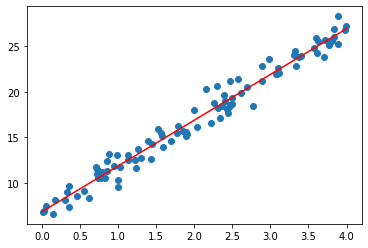

In [45]:
# Построим график восстановленной линейной регрессии
'''
plt.scatter(X, y)

x = np.linspace(0.,4.)
plt.plot(x, beta_best[0] + x * beta_best[1], color='r')

plt.show()
'''

In [46]:
# Обучение регрессии, с помощью библиотеки sklearn
'''from sklearn.linear_model import LinearRegression

X_new = np.array([[0], [2]])

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

y_pred = lin_reg.predict(X_new)
#print(y_pred)
'''

[6.88328114] [[5.01023548]]


### Ссылки

1. Оригинал аналитического решения:
https://stats.stackexchange.com/a/46171

2. Aurélien Géron. Hands-On Machine Learning with Scikit-Learn and TensorFlow, C. 150